<a href="https://colab.research.google.com/github/Tuchsanai/AIMaster-seagate-training-2024/blob/main/Day1/Huggingface_Dataset/02_Create_Huggingface_dataset/Custom_image_dataset_from_floder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 32.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [10]:
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (99.6 kB/s)
Selecting previously unselected package tree.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [2]:
import os
os.environ['HF_TOKEN'] ="your_hugging_face_token_here"


In [3]:
!wget https://github.com/Tuchsanai/AIMaster-seagate-training-2024/raw/main/Dataset/Alien_Predator.zip

--2024-05-20 13:32:15--  https://github.com/Tuchsanai/AIMaster-seagate-training-2024/raw/main/Dataset/Alien_Predator.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Tuchsanai/AIMaster-seagate-training-2024/main/Dataset/Alien_Predator.zip [following]
--2024-05-20 13:32:16--  https://raw.githubusercontent.com/Tuchsanai/AIMaster-seagate-training-2024/main/Dataset/Alien_Predator.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7757990 (7.4M) [application/zip]
Saving to: ‘Alien_Predator.zip’

Alien_Predator.zip  100%[===================>]   7.40M  --.-KB/s    in 0.09s   

2024-05-20 13:32:16 (

In [4]:
!unzip /content/Alien_Predator.zip

Archive:  /content/Alien_Predator.zip
   creating: Alien_Predator/
  inflating: __MACOSX/._Alien_Predator  
  inflating: Alien_Predator/.DS_Store  
  inflating: __MACOSX/Alien_Predator/._.DS_Store  
   creating: Alien_Predator/train/
  inflating: __MACOSX/Alien_Predator/._train  
   creating: Alien_Predator/validation/
  inflating: __MACOSX/Alien_Predator/._validation  
  inflating: Alien_Predator/train/.DS_Store  
  inflating: __MACOSX/Alien_Predator/train/._.DS_Store  
   creating: Alien_Predator/train/predator/
  inflating: __MACOSX/Alien_Predator/train/._predator  
   creating: Alien_Predator/train/alien/
  inflating: __MACOSX/Alien_Predator/train/._alien  
  inflating: Alien_Predator/validation/.DS_Store  
  inflating: __MACOSX/Alien_Predator/validation/._.DS_Store  
   creating: Alien_Predator/validation/predator/
  inflating: __MACOSX/Alien_Predator/validation/._predator  
   creating: Alien_Predator/validation/alien/
  inflating: __MACOSX/Alien_Predator/validation/._alien  
  i

In [11]:
!tree /content/Alien_Predator -L 2

/content/Alien_Predator
├── train
│   ├── alien
│   └── predator
└── validation
    ├── alien
    └── predator

6 directories, 0 files


In [12]:
from datasets import load_dataset

dataset = load_dataset("imagefolder", data_dir="./Alien_Predator")

dataset

Resolving data files:   0%|          | 0/694 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/200 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 694
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 200
    })
})

In [13]:
dataset['train'][0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=225x225>,
 'label': 0}

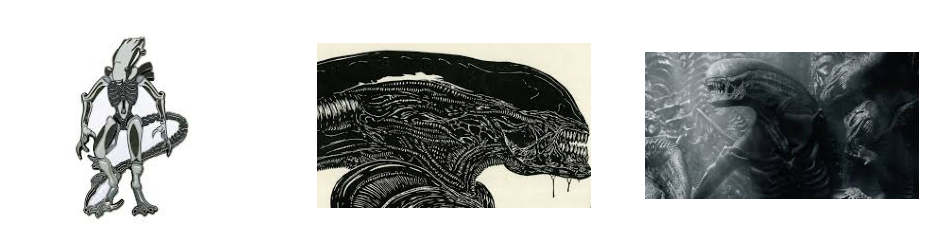

In [17]:
import matplotlib.pyplot as plt

def show_images(dataset, num_images=3):
    plt.figure(figsize=(12, 3))
    for i in range(num_images):
        image = dataset[i]['image']
        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

# Show some images from the training dataset
show_images(dataset['train'])

# push data to hub

https://huggingface.co/datasets/Tuch/alient_predator

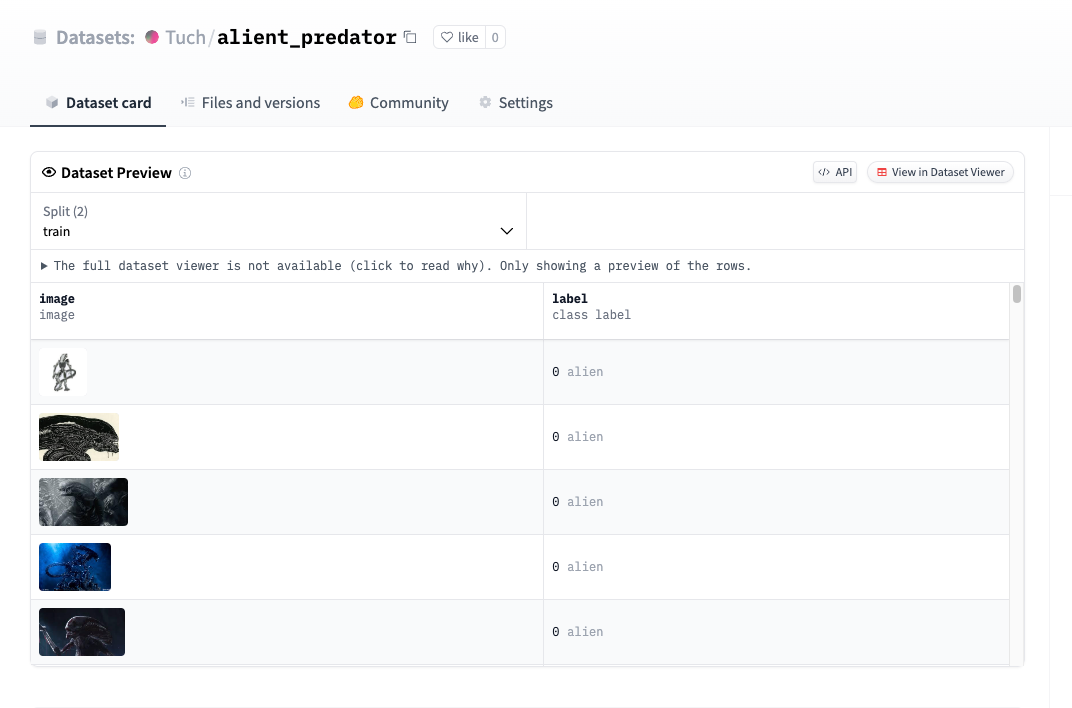

In [20]:
dataset.push_to_hub("alient_predator")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/694 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/7 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/Tuch/alient_predator/commit/35a0a54cc121c7fc02bc587ba5f27ffeadcea61e', commit_message='Upload dataset', commit_description='', oid='35a0a54cc121c7fc02bc587ba5f27ffeadcea61e', pr_url=None, pr_revision=None, pr_num=None)

# test download dataset

In [21]:
from datasets import load_dataset

test_datasets = load_dataset("Tuch/alient_predator")
test_datasets

Generating train split:   0%|          | 0/694 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/200 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 694
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 200
    })
})

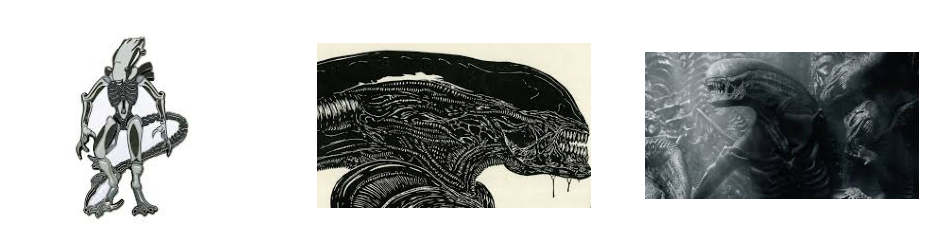

In [23]:
import matplotlib.pyplot as plt

def show_images(dataset, num_images=3):
    plt.figure(figsize=(12, 3))
    for i in range(num_images):
        image = dataset[i]['image']
        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

# Show some images from the training dataset
show_images(test_datasets['train'])